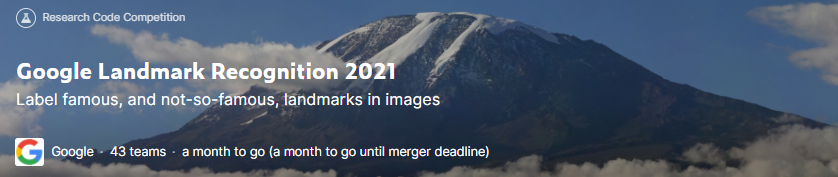

In [ ]:
# --- CSS STYLE ---
from IPython.core.display import HTML
def css_styling():
    styles = open("../input/competiongoal/archive/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

<div class="alert simple-alert"><font color="black">
 <b>Competition Goal</b>  </i>  :Kagglers to build models that recognize the correct landmark detectors.
</div>


contains a much larger number of classes (there are more than 81K classes in this challenge), and the number of training examples per class may not be very large. Landmark recognition is challenging in its own way.

In [ ]:
import os
import glob
import cv2
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
train_df = pd.read_csv('../input/landmark-recognition-2021/train.csv')
train_df

In [ ]:
len(train_df.landmark_id.unique())

In [ ]:
sub =pd.read_csv('../input/landmark-recognition-2021/sample_submission.csv')
sub

 <span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;"> Landmark_id distribuition</span>

In [ ]:
plt.title('landmark_id distribution')
sns.distplot(train_df['landmark_id'])


 <span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;"> Training set: number of images per class(line plot)</span>



#### There are variations in the number of items with the same ID.

In [ ]:
sns.set()
plt.title('Training set: number of images per class(line plot)')
landmarks_fold = pd.DataFrame(train_df['landmark_id'].value_counts())
landmarks_fold.reset_index(inplace=True)
landmarks_fold.columns = ['landmark_id','count']
ax = landmarks_fold['count'].plot(logy=True, grid=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Landmarks", ylabel="Number of images")

 <span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">  Training set: number of images per class(scatter plot))</span>

#### Some of them have the same number.There is one that stands out in 125000.

In [ ]:
sns.set()
landmarks_fold_sorted = pd.DataFrame(train_df['landmark_id'].value_counts())
landmarks_fold_sorted.reset_index(inplace=True)
landmarks_fold_sorted.columns = ['landmark_id','count']
landmarks_fold_sorted = landmarks_fold_sorted.sort_values('landmark_id')
ax = landmarks_fold_sorted.plot.scatter(\
     x='landmark_id',y='count',
     title='Training set: number of images per class')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Landmarks", ylabel="Number of images")

 <span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;"> Display examples </span>

### There are many 138982 numbers. Let's examine this.

In [ ]:
landmarks_fold.head()

In [ ]:
train = train_df[train_df.landmark_id==138982]
train

In [ ]:
def get_train_file_path(image_id):
    return "../input/landmark-recognition-2021/train/{}/{}/{}/{}.jpg".format(
        image_id[0], image_id[1], image_id[2], image_id)
train['file_path'] = train['id'].apply(get_train_file_path)
train.head()

#### The only thing they have in common is the band at the bottom of the photo

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in train.file_path[:12]:
    image = cv2.imread(i)
    
    fig.add_subplot(4, 4, x)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    x+=1
            

### Next,There are many 126637 numbers. Let's examine this.

In [ ]:
train = train_df[train_df.landmark_id==126637]

In [ ]:

train['file_path'] = train['id'].apply(get_train_file_path)


train.head()

### The common point is that it looks like a ship, but I'm not sure because some of them don't have a ship.

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in train.file_path[:20]:
    image = cv2.imread(i)
    
    fig.add_subplot(4, 5, x)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    x+=1

㊙🔰🗑⬛🟥🟨🟩